# <center> <font style="color:rgb(100,109,254)"> Image Classification </font> </center>

### Using Pre trained Deep Learning Model

In [1]:
# Importing Required libraries
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk 
import os
import sys

### Loading Class Labels

In [4]:
# Split all the classes by a new line and store it in variable called rows.
rows = open('Models/synset_words.txt').read().strip().split("\n")

# Check the number of classes.
print("Number of Classes "+str(len(rows)))

# Splitting by comma after first space is found, grabbing the first element and storing it in a new list.
CLASSES = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

# Print the first 50 processed class labels 
print(CLASSES[0:50])

Number of Classes 1000
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile']


##  <font style="color:rgb(134,19,348)"> Read An Image </font>
Read the image on which we'll attempt classification.

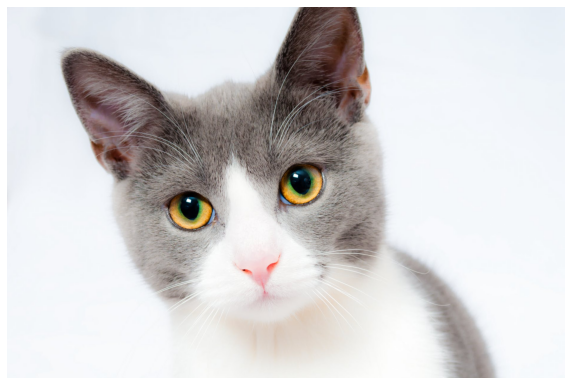

In [5]:
# Load the input image
image = cv2.imread('Media/cat.jpeg')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,::-1]);plt.axis("off");

## <font style="color:rgb(134,19,348)">  Initializing the DNN Module </font>

Now before we can use the DNN Module we must initialize it using one of the following functions.

- `Caffe Modles:`      **cv2.dnn.readNetFromCaffe**                                                            
- `Tensorflow Models:` **cv2.dnn.readNetFromTensorFlow** 
- ` Pytorch Models:`   **cv2.dnn.readNetFromTorch**

As you can see the function you use depends upon Original Architecture the model was trained on.

Since we'll be using a Caffe model so our function will be:

[```retval = cv2.dnn.readNetFromCaffe( prototxt[, caffeModel] )```](https://docs.opencv.org/4.2.0/d6/d0f/group__dnn.html#ga29d0ea5e52b1d1a6c2681e3f7d68473a)

**Params:**

- **`prototxt:`**	Path to the .prototxt file, this is the text description of the architecture of the model. 
- **`caffeModel:`**	path to the .caffemodel file, this is your actual trained neural network model, it contains all the weights/parameters of the model. This is usually several MBs in size.

**Note:** If you load the model and proto file via *readNetFromTensorFlow* then the order of architecture and model inputs are reversed.

Here's the Architecture of GoogleNet.
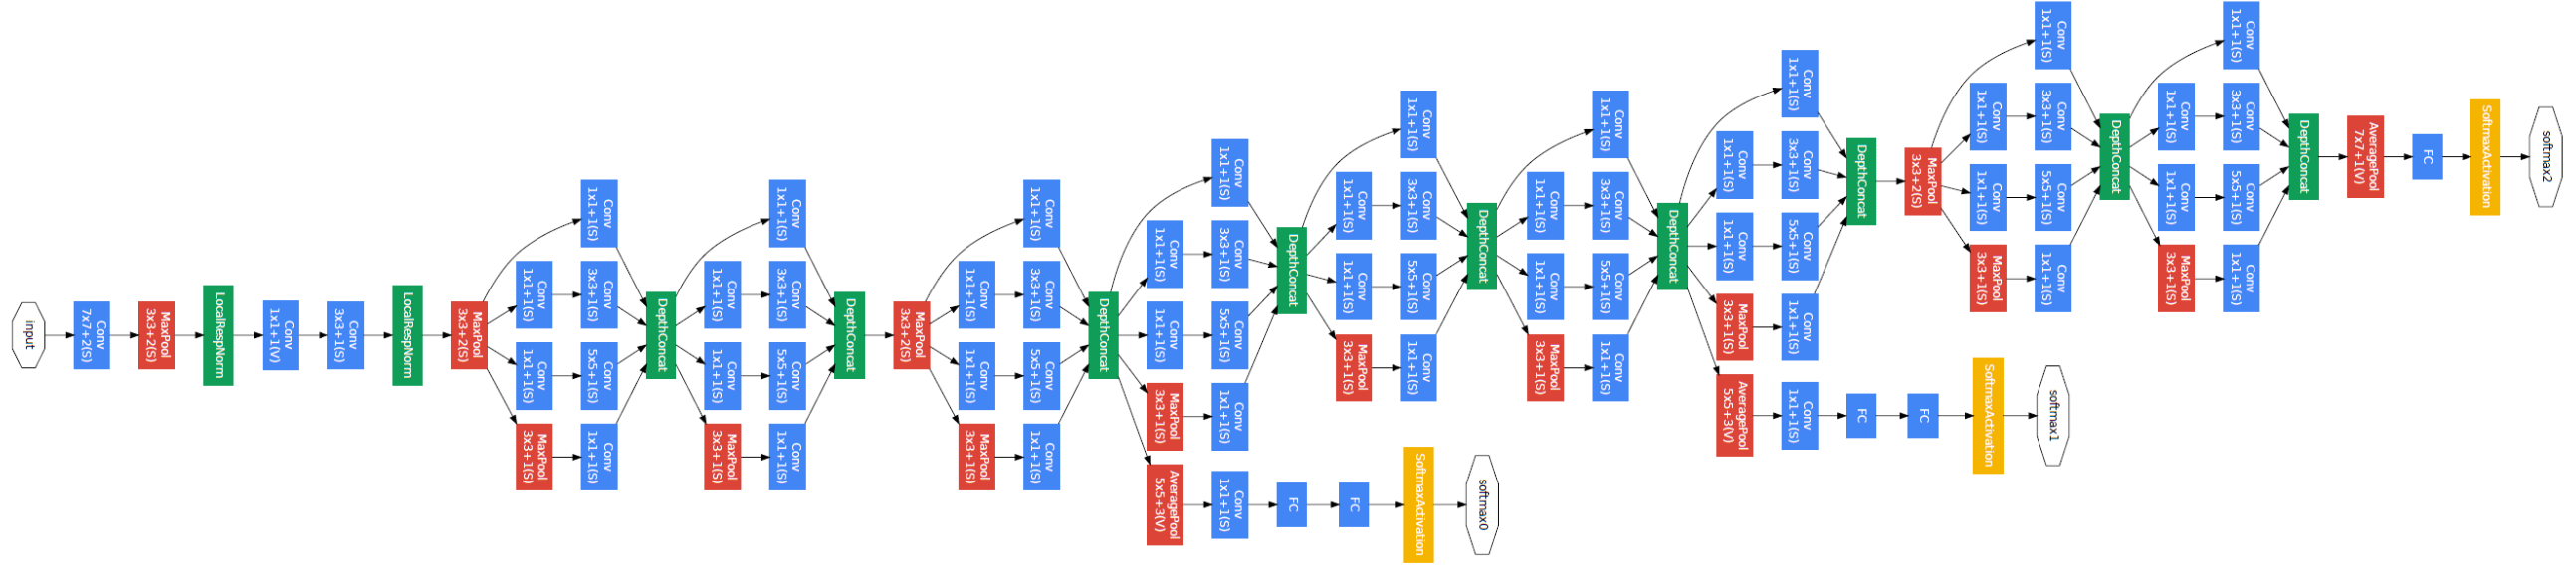

In [6]:
# Load the Model Weights.
weights = 'Models/bvlc_googlenet.caffemodel'

# Load the googleNet Architecture.
architecture ='Models/bvlc_googlenet.prototxt' 

# Initialize the network.
net = cv2.dnn.readNetFromCaffe(architecture, weights)

In [7]:
# Here we are reading pre-trained caffe model with its architecture using opencv dnn module which accepts only 2 parameters 
net = cv2.dnn.readNetFromCaffe(architecture, weights)

## <font style="color:rgb(134,19,348)"> Pre-processing the image</font>

Now before you pass an image in the network you need to preprocess it, this means resizing the image to the size it was trained on, for many networks this is 224x224, in pre-processing step you also do other things like Normalize the image (make the range of intensity values between 0-1) and mean subtraction etc. These are all the steps the authors did on the images that were used during model training.

Fortunately In OpenCV you have a function called **cv2.dnn.blobFromImage()** which most of the times takes care of all the pre-processing for you.

 [```blob = cv2.dnn.blobFromImage(image[, scalefactor[, size[, mean[, swapRB[, crop]]]]])```]( https://docs.opencv.org/4.2.0/d6/d0f/group__dnn.html#ga29f34df9376379a603acd8df581ac8d7)

**Params:**

- **`Image`**  Input image.
- **`Scalefactor`**  Used to normalize the image. This value is multiplied by the image, value of 1 means no scaling is done.
- **`Size`**  The size to which the image will be resized to, this depends upon the each model. 
- **`Mean`** These are mean R,G,B Channel values from the whole dataset and these are subtracted from the image's R,G,B respectively, this gives illumination invariance to the model.
- **`swapRB`** Boolean flag (false by default) this indicates weather swap first and last channels in 3-channel image is necessary.
- **`crop`** flag which indicates whether image will be cropped after resize or not. If crop is true, input image is resized so one side after resize is equal to corresponding dimension in size and another one is equal or larger. Then, crop from the center is performed. If crop is false, direct resize without cropping and preserving aspect ratio is performed.

So After this function we get a 4d blob, this is what we'll pass to the network.

In [8]:
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))

 **Note:** There is also [**blobFromImages()**](https://docs.opencv.org/4.2.0/d6/d0f/group__dnn.html#ga0b7b7c3c530b747ef738178835e1e70f) which does the same thing but with multiple images.

## <font style="color:rgb(134,19,348)"> Input the Blob Image to the Network  </font>
Here you're setting up the blob image as the input to the network.

In [9]:
# Passing the blob as input through the network 
net.setInput(blob)

##  <font style="color:rgb(134,19,348)"> Forward Pass </font>
Here the actual computation will take place, Most of the time in your whole pipeline will be taken here. Here your image will go through the all the model parameters and at the end you will get the output of the classifier.

In [10]:
%%time
Output = net.forward()

Wall time: 241 ms


In [13]:
# Maximum Probabilitry for this image
np.max(Output[0])

0.36285302

In [14]:
# Index of Class with the maximum Probability.
index = np.argmax(Output[0])
print(index)

285


In [15]:
# Name of the Class with the maximum probability 
CLASSES[index]   

'Egyptian cat'

**By sorting the probabilities, we can get top `n` predictions**

In [16]:
# Getting the index of top 5 classes.
n = 5
top_5 = np.argsort(Output[0])[::-1][:n] 
print(top_5)

[285 281 282 284 287]


In [17]:
# Printing the names of top 5 classes
for index in top_5:
   print(CLASSES[index])

Egyptian cat
tabby
tiger cat
Siamese cat
lynx


#  <center> <font style="color:rgb(100,109,254)"> Object Detection </font> </center>

## <font style="color:rgb(134,19,348)"> Loading class labels </font>
We'll start by loading class labels, this detection network is trained on COCO dataset (Common Objects in Context) which has 80-90 classes. Then it has been fine tuned on Pascal VOC dataset which has 20 classes. We're defining these classes.

In [19]:
# Extract the Classes.
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
"sofa", "train", "tvmonitor"]

# Total number of Classes - background class
print('Total Number of classes are: {} \n'.format(len(CLASSES)-1))
      
# See the classes.      
print(CLASSES)

Total Number of classes are: 20 

['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


**We'll be drawing each class with a particular colored box, so we'll create a list of unique colors**

In [20]:
# Randomize with same pattern each time.
np.random.seed(50)

# Create the random list of colors of required size.
COLORS = np.random.uniform(0, 255, size=(len(CLASSES),3))

## Init the DNN module

In [21]:
# Load the Model Weights.
weights ='Models/MobileNetSSD_deploy.caffemodel'

# Load the googleNet Architecture.
arch= 'Models/MobileNetSSD_deploy.prototxt.txt'

# Initialize the network.
net = cv2.dnn.readNetFromCaffe(arch, weights)

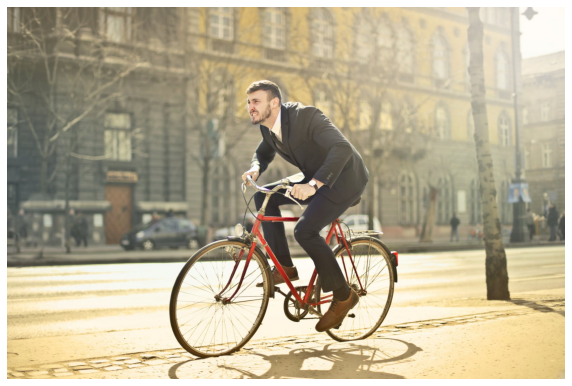

In [22]:
# Load the input image from disk
image = cv2.imread('Media/bicycle.jpeg')

# Display it
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,::-1])
plt.axis("off");

In [26]:
blob = cv2.dnn.blobFromImage(image, 0.007843,(300, 300), (127.5,127.5,127.5),True)
# Passing the blob as input through the network 
net.setInput(blob)

In [28]:
%%time
# Return the detections 
detections = net.forward()

Wall time: 77 ms


## <font style="color:rgb(134,19,348)"> Draw the Bounding Boxes </font>
Now that we have understood the structure of our detection object, we'll loop through it and draw each detection with its class name and bounding box if it has enough confidence.

bicycle: 100.00%
person: 99.95%


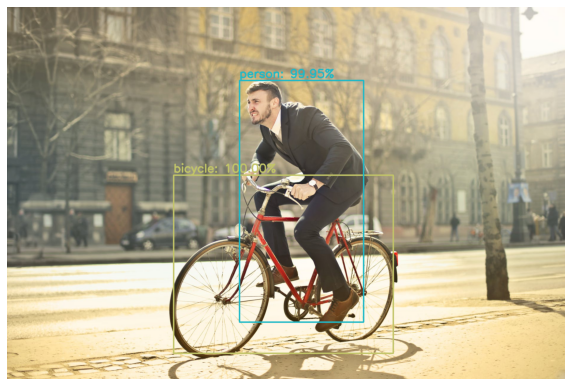

In [29]:
h,w = image.shape[:2]
img_copy = image.copy()

# Objects with confidence less than this are ignored
threshold = 0.5

# Loop over the detections
for i in np.arange(0, detections.shape[2]):
    
    # Extract the confidence probablity associated with the prediction 
    confidence = detections[0, 0, i, 2]

    # Filter Out weak detections
    if confidence > threshold:
        
        # Extracting the index of the class.
        index = int(detections[0, 0, i, 1])
        
        # Extract the (x1,x2,y1,y2) coordinates of the bounding box for each obejct 
        x_1 = int(detections[0, 0, i, 3] * w)
        y_1 = int(detections[0, 0, i, 4] * h)
        x_2 = int(detections[0, 0, i, 5] * w)
        y_2 = int(detections[0, 0, i, 6] * h)

        # Display the target class name and their confidence score.
        label = "{}: {:.2f}%".format(CLASSES[index], confidence * 100)
        
        print(label)
                
        # Draw the rectangle on object w.r.t their cordinates. 
        cv2.rectangle(img_copy, (x_1, y_1), (x_2, y_2), COLORS[index], 4)
        
        # Put the Label of the detected object 
        cv2.putText(img_copy, label, (x_1, y_1-10), cv2.FONT_ITALIC, 1.3, COLORS[index], 3)

# Display Detection
plt.figure(figsize=(10,10))        
plt.imshow(img_copy[:,:,::-1])
plt.axis("off");

# <center>  <font style="color:rgb(100,109,254)">Facial Expression Recognition</font> </center>

In [43]:
import bleedfacedetector as fd

# Set model path
model = 'Models/emotion-ferplus-8.onnx'

# Initialize the network
net = cv2.dnn.readNetFromONNX(model)

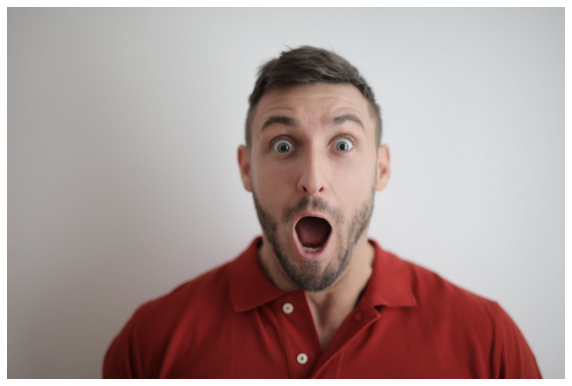

In [53]:
# Read image
image = cv2.imread("Media/surprise.jpeg")

# Display image
plt.figure(figsize=[10,10])
plt.imshow(image[:,:,::-1])
plt.axis('off');

In [54]:
# Define the emotions
emotions = ['Neutral', 'Happy', 'Surprise', 'Sad', 'Anger', 'Disgust', 'Fear', 'Contempt']

In [55]:
#Detect Face
img_copy = image.copy()

# Use SSD detector with 20% confidence threshold.
faces = fd.ssd_detect(img_copy, conf=0.2)

# Check the number detected faces in image
print("{} faces detected".format(len(faces)))

# Lets take coordinates of the first face in the image. 
x,y,w,h = faces[0]

# Define padding for face roi
padding = 3

# extract the Face from image with padding.
face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding] 

1 faces detected


In [56]:
# Pre processing
face = cv2.resize(face[:,:,1], (64, 64))
imager = face.reshape(1,1,64,64)

In [57]:
# input image to net
net.setInput(imager)

In [58]:
%%time
Output = net.forward()

Wall time: 119 ms


In [59]:
# Get the index of the max probability and that's your predicted emotion
print('Predicted Emotion is :{}'.format(emotions[Output[0].argmax()]))

Predicted Emotion is :Surprise


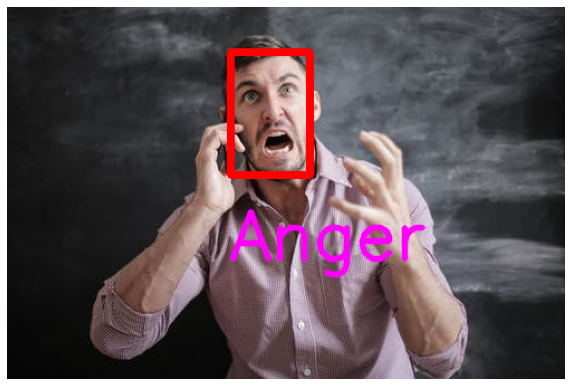

In [66]:
# image = cv2.imread("Media/surprise.jpeg")
image = cv2.imread("Media/emotion1.jpeg")
img_copy = image.copy()
padding = 10
faces = fd.ssd_detect(img_copy, conf=0.2)
# Iterate for each detected faces & apply the above process for each face.
for x,y,w,h in faces:
    
    # Padd the face
    face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding]
    
    face = cv2.resize(face[:,:,1], (64, 64))
    imager = face.reshape(1,1,64,64)
    
    net.setInput(imager)
    
    # Perfrom the forward pass.
    Output = net.forward()
    
    # Get the predicted age group.
    predicted_emotion = emotions[Output.argmax()]
    
    # Draw the bounding box around the face and put the age group.
    cv2.putText(img_copy,'{}'.format(predicted_emotion),(x,y+h+75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,255), 4, cv2.LINE_AA)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),5)
    
plt.figure(figsize=(10,10))
plt.imshow(img_copy[:,:,::-1]);plt.axis("off");

# <center> <font style="color:rgb(100,109,254)"> Neural Style Transfer</font> </center>


Most of you have probably used apps like Prisma, where you can transform a photo from your camera to look like a cool artistic painting.

In [79]:
model ='Models/style-model/candy.t7'
# loading the neural style model from disk
net = cv2.dnn.readNetFromTorch(model)

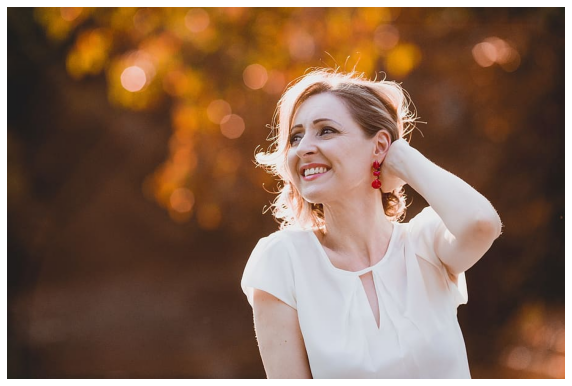

In [80]:
# Read image
image = cv2.imread("Media/girl.jpg")

# Display image
plt.figure(figsize=[10,10])
plt.imshow(image[:,:,::-1])
plt.axis('off');

In [81]:
# Pre Process Image
# Define RGB value for mean subtraction, these are the values that were subtracted from channels during training.
R,G,B = 103.939, 116.779, 123.680

# Prepare the frame to be fed to the network
blob = cv2.dnn.blobFromImage(image, 1.0, (image.shape[1], image.shape[0]),(R,G,B), swapRB=False)

In [82]:
%%time
net.setInput(blob)
output = net.forward()

Wall time: 2.08 s


In [83]:
# Post Process
# Reshaping the output
final_output = output.reshape((3, output.shape[2], output.shape[3])).copy()


# Add all mean values back which we subracted earlier
final_output[0] += R
final_output[1] += G
final_output[2] += B

In [84]:
# Reformat Image
final_output = final_output.transpose(1, 2, 0)

In [85]:
# Here we are clipping all values below or above  0 , 255 
outmid = np.clip(final_output, 0, 255)

# Convert the datatype back to uint8
styled = outmid.astype('uint8')

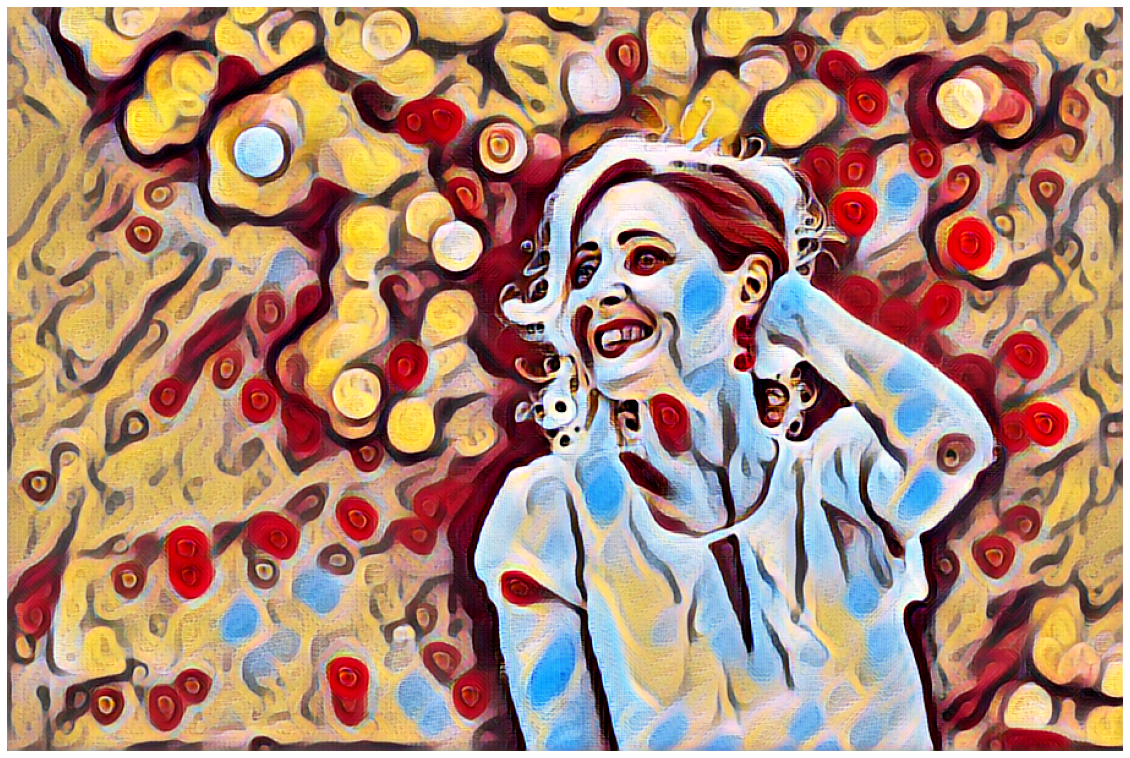

In [86]:
plt.figure(figsize=(20,20))
plt.imshow(styled[:,:,::-1]);plt.axis("off");

In [96]:
# Define Model name
model_name= ['feathers', 'candy', 'composition_vii', 'udnie', 'the_wave', 'the_scream', 'mosaic', 'la_muse', 'starry_night']

def init_style_transfer(style="candy",usegpu = 'None'):
    global net
    if style in model_name:
        model ='Models/style-model/'+style+".t7" 
        net = cv2.dnn.readNetFromTorch(model)
        # If specified use either cuda based Nvidia gpu or opencl based Intel gpu.   
        if usegpu == 'cuda':
            net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
            net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

        elif usegpu == 'opencl':
            net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)    

In [97]:
def style_tranfer(image=[], usercam=False,returndata=False):
    if np.size(image) == 0:
        
        # If usercam cam is True then take picture from camera
        if usercam:
            cap=cv2.VideoCapture(0, cv2.CAP_DSHOW)
            ret, frame=cap.read()
            if ret:
                image= cv2.flip(frame,1)
                cap.release()
            else:
                print('Cant Open Camera')
                sys.exit()
                
        # Otherwise select image from computer using tkinter        
        else:
            root = Tk()
            root.filename =  filedialog.askopenfilename(title = "Pick up the Image")
            root.withdraw()
            image = cv2.imread(root.filename)
    R,G,B = 103.939, 116.779, 123.680
    blob = cv2.dnn.blobFromImage(image, 1.0, (image.shape[1], image.shape[0]),(R,G,B), swapRB=False, crop=False)
    net.setInput(blob)
    output = net.forward()
    final_output = output.reshape((3, output.shape[2], output.shape[3])).copy()
    final_output[0] += R
    final_output[1] += G
    final_output[2] += B
    final_output = final_output.transpose(1, 2, 0)
    outmid = np.clip(final_output, 0, 255)
    styled= outmid.astype('uint8')
    
    if  returndata:           
        return styled
    else:
        plt.figure(figsize=(20,20))
        plt.imshow(styled[:,:,::-1]);plt.axis("off");

In [98]:
init_style_transfer()

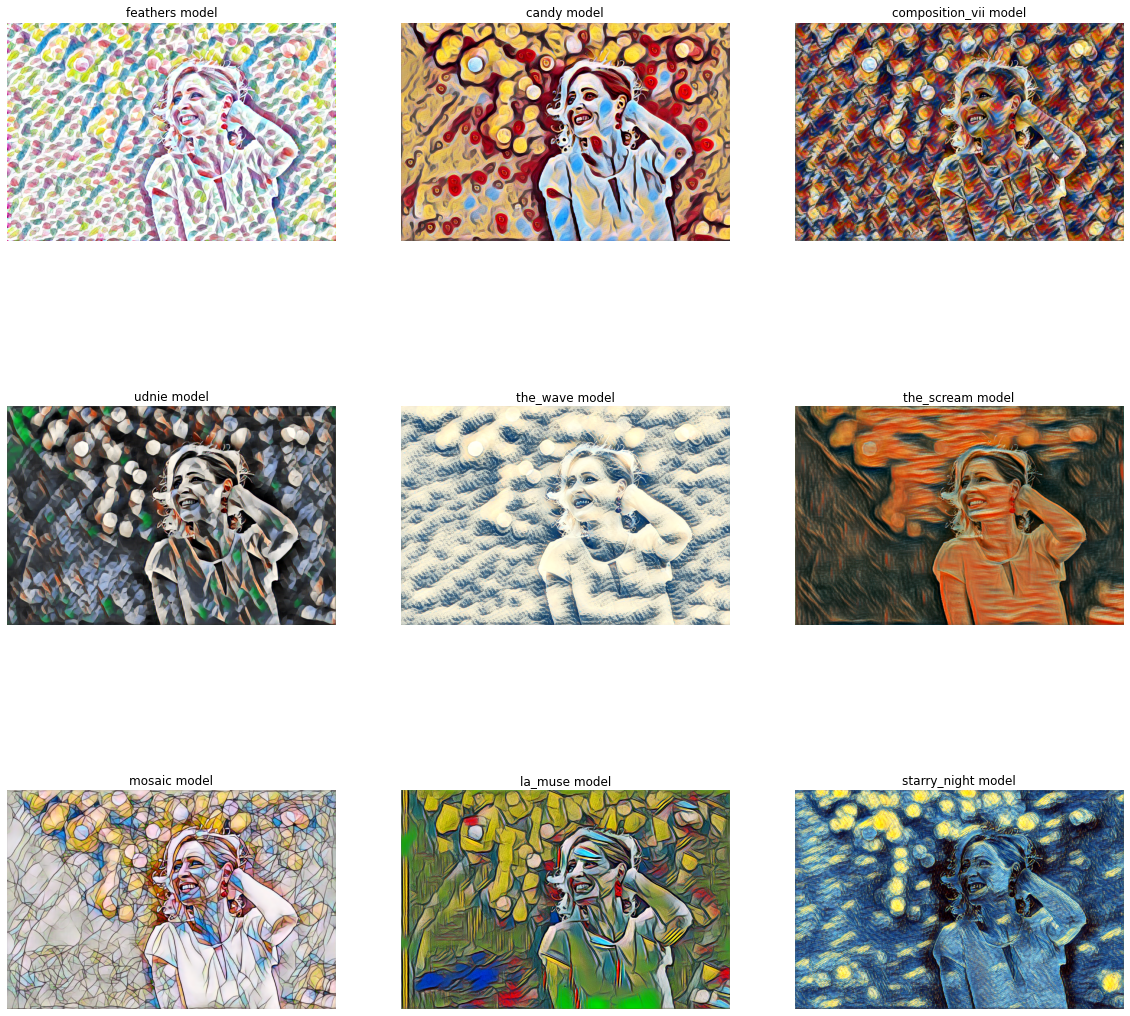

In [99]:
# Defining rows and columns
rows = 3

# Define Figure Size
plt.figure(figsize=(20,20));

# Show all points with prob map
for i,model in enumerate(model_name):
    init_style_transfer(model)
    styled = style_tranfer(image,returndata=True);
    plt.subplot(rows, 3,i+1);plt.imshow(styled[:,:,::-1]);plt.title(model + " model");plt.axis("off") 

In [106]:
# On Video
# Initializing method
init_style_transfer()

# Starting video reading mode
# cap = cv2.VideoCapture('Media/dpose1.mp4')
cap = cv2.VideoCapture(0)

while(True):
    
    ret, frame = cap.read()
    if not ret:
        break
        
    styled = style_tranfer(frame,returndata=True)
    
    cv2.imshow('Styled Video',styled)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()